#Import the Necessary Libraries

data manipulation and analysis purpose

Using Visulization purpose

Numerical Computations

Advance Visulization

In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Load the Dataset and  Analysis

View the Bottom five Rows

View the Top five Rows

View the Random Rows

In [309]:
df=pd.read_csv("/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv")

In [310]:
df.head(5)

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [311]:
df.tail(5)

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
1913,19/01/2023,11337,8671,262,14881,0,66.0
1914,16/08/2023,16791,11800,387,20936,4684,113.0
1915,10/01/2022,5732,3548,73,6644,0,25.0
1916,04/05/2020,3717,1952,70,4411,131,19.0
1917,26/07/2023,16680,11726,347,20438,4738,99.0


In [312]:
df.sample(5)

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
1591,29/07/2023,3889,6929,0,8827,0,12.0
1362,29/01/2021,9839,6673,200,11929,0,50.0
1086,07/09/2019,4965,6261,0,7801,0,0.0
1667,10/01/2024,11414,8630,293,14783,0,64.0
17,19/07/2024,11573,9340,254,15526,0,70.0


#Data Understanding
This dataset taken from the public transports like bus and rail services.

1.Local Route  represent the ->number of passsengers take the local bus serivice

2.Light Rail represent the ->number of passsengers take the local train service

3.school represent the -> number of student take the  public transport

3.peak service -> the how many  public transport using in peak service

4.rapid route-> how many passengers going in the particular route

5.other -> it represent the not taking public transport

#My Target  -->

I created a new target column called total_passengers by summing all service-type columns. This target represents the total number of public transport passengers per day, which I will predict for future dates and also each(Local Route, Light Rail, Rapid Route, School, other,peak service )this I will predict for future dates.

View the how many rows and columns

View the Column Names

Count the Null Values

View the Data Types

General Information about the dataset

In [313]:
print("Column Names:",df.columns)

Column Names: Index(['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route',
       'School', 'Other'],
      dtype='object')


In [314]:
print("Shape:",df.shape)

Shape: (1918, 7)


Data Cleaning

In [315]:
print("Null Values:",df.isnull().sum())#other column have 20 null values

Null Values: Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


In [316]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)


            Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
160   29/09/2024            1           0             0            3       0   
790   24/08/2019         5439        6396             0         8283       0   
854   17/08/2019         5506        6583             0         7922       0   
1013  01/07/2019        15987        9962           407        21223    3715   
1041  10/08/2019         4836        5422             0         7219       0   
1109  07/07/2019         4065        4332             0         5426       0   
1120  02/07/2019        16895       10656           409        21715    3993   
1171  04/07/2019        16604       10445           437        21868    3576   
1330  26/09/2024            9           0             0            0       2   
1387  21/09/2024           28         832             0           64       0   
1451  03/07/2019        16613       10658           427        22025    3638   
1464  06/02/2020        20061       1186

In [317]:
df['Other'].fillna(0, inplace=True) #Null values  fill with  '0'


/tmp/ipython-input-2515300457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Other'].fillna(0, inplace=True) #Null values  fill with  '0'


In [318]:
print("Null Values:",df.isnull().sum())

Null Values: Date            0
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64


In [319]:
print("Data Type:",df.dtypes)

Data Type: Date             object
Local Route       int64
Light Rail        int64
Peak Service      int64
Rapid Route       int64
School            int64
Other           float64
dtype: object


In [320]:
print("Information:",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1918 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB
Information: None


In [321]:
df.describe(include='all')#Summary Statistics


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000
unique,1918,NaN,NaN,NaN,NaN,NaN,NaN
top,26/07/2023,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,42.937956
std,NaN,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.761911
min,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,NaN,11417.000000,7507.000000,193.000000,13106.500000,567.500000,39.000000
75%,NaN,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,67.750000


#Data Transformation

Date (object dtype) convert into Date(real datetime dtype) format

In [322]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipython-input-2394721818.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [323]:
df.set_index('Date', inplace=True)#set index to date
df.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2024-08-30,16436,10705,225,19026,3925,59.0
2023-09-15,15499,10671,267,18421,4519,61.0
2021-12-28,1756,2352,0,3775,0,13.0
2023-01-11,10536,8347,223,14072,0,48.0
2021-09-11,820,612,0,1283,0,11.0


In [324]:
df = df.sort_index()
df.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-01,15987,9962,407,21223,3715,0.0
2019-07-02,16895,10656,409,21715,3993,0.0
2019-07-03,16613,10658,427,22025,3638,0.0
2019-07-04,16604,10445,437,21868,3576,0.0
2019-07-05,16040,10532,400,20697,2856,0.0


#Outliers

Replace outliers instead of deleting

*Winsorize*

Keep time-series nature intact

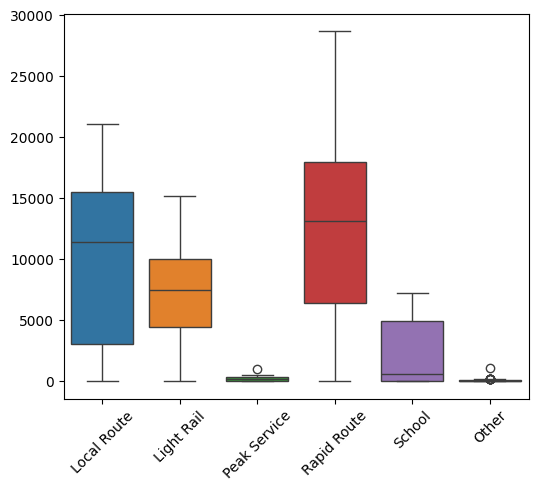

In [325]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


In [326]:
#Winsorization
from scipy.stats.mstats import winsorize

df['Peak Service'] = winsorize(df['Peak Service'], limits=[0.05, 0.05])
df['Other'] = winsorize(df['Other'], limits=[0.05, 0.05])


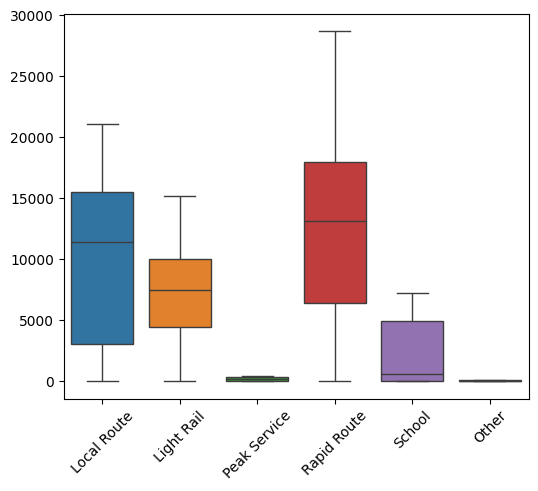

In [327]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


#Trend
set of observation  changinig over the time period  is like up or down is called trend

In [328]:
df.head(5)

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-01,15987,9962,407,21223,3715,0.0
2019-07-02,16895,10656,409,21715,3993,0.0
2019-07-03,16613,10658,427,22025,3638,0.0
2019-07-04,16604,10445,427,21868,3576,0.0
2019-07-05,16040,10532,400,20697,2856,0.0


In [329]:
df["total_passengers"] = df["Local Route"] + df["Light Rail"] + df["Peak Service"] + df["Rapid Route"] + df["School"] + df["Other"]


In [330]:
df.head(3)

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,total_passengers
Date,,,,,,,
2019-07-01,15987,9962,407,21223,3715,0.0,51294.0
2019-07-02,16895,10656,409,21715,3993,0.0,53668.0
2019-07-03,16613,10658,427,22025,3638,0.0,53361.0


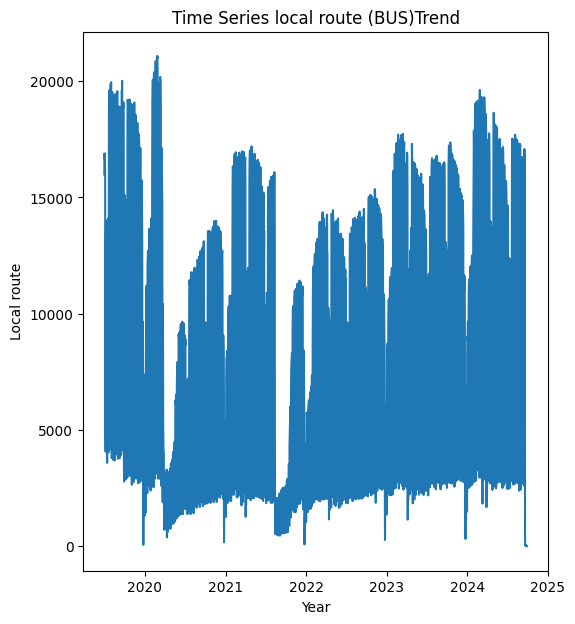

In [331]:
plt.figure(figsize=(6,7))
plt.plot(df['Local Route'])
plt.title("Time Series local route (BUS)Trend")
plt.xlabel("Year")
plt.ylabel("Local route")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


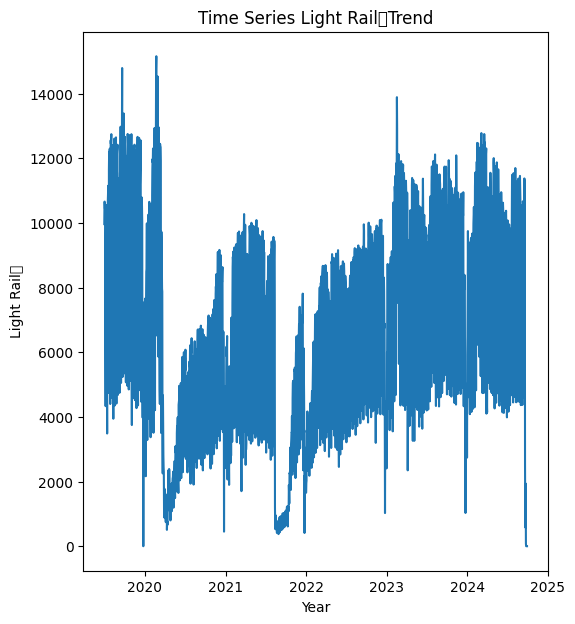

In [332]:
plt.figure(figsize=(6,7))
plt.plot(df['Light Rail'])
plt.title("Time Series Light Rail	Trend")
plt.xlabel("Year")
plt.ylabel("Light Rail	")
plt.show()


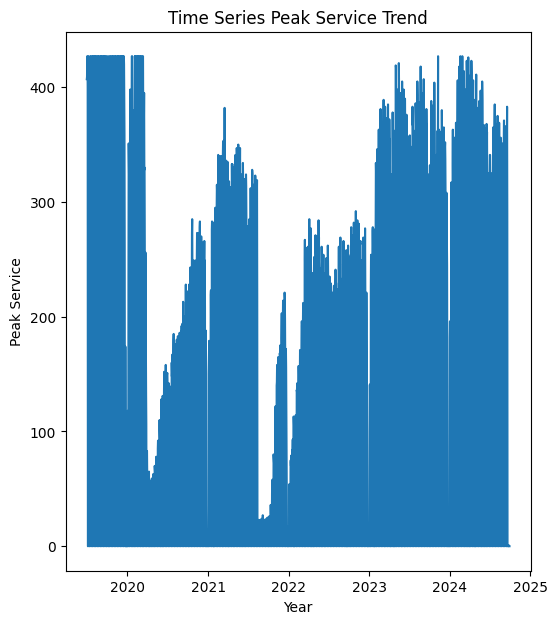

In [333]:
plt.figure(figsize=(6,7))
plt.plot(df['Peak Service'])
plt.title("Time Series Peak Service Trend")
plt.xlabel("Year")
plt.ylabel("Peak Service")
plt.show()


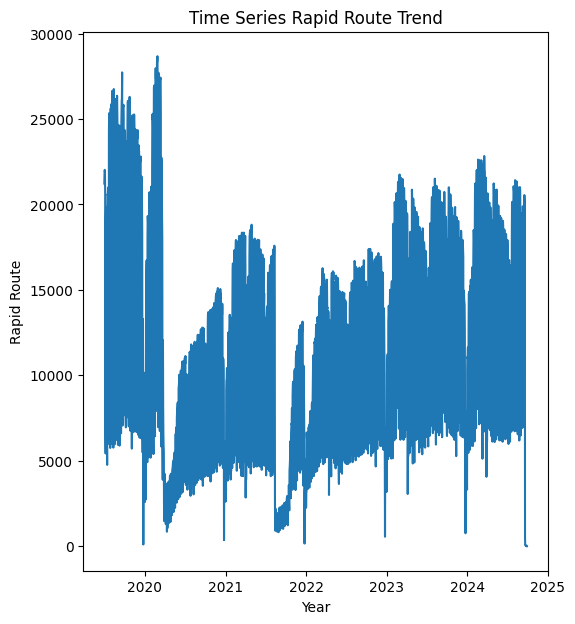

In [334]:
plt.figure(figsize=(6,7))
plt.plot(df['Rapid Route'])
plt.title("Time Series Rapid Route Trend")
plt.xlabel("Year")
plt.ylabel("Rapid Route")
plt.show()


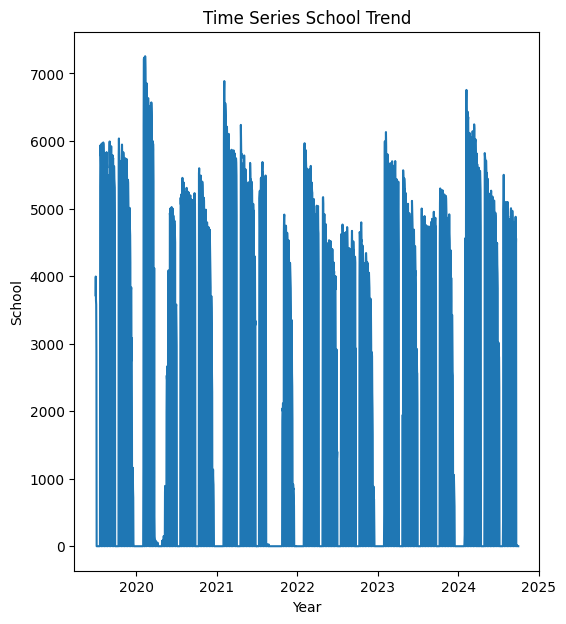

In [335]:
plt.figure(figsize=(6,7))
plt.plot(df['School'])
plt.title("Time Series School Trend")
plt.xlabel("Year")
plt.ylabel("School")
plt.show()


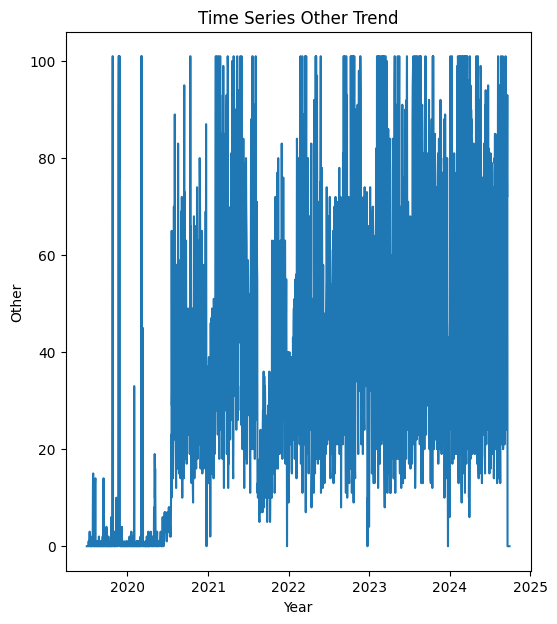

In [336]:
plt.figure(figsize=(6,7))
plt.plot(df['Other'])
plt.title("Time Series Other Trend")
plt.xlabel("Year")
plt.ylabel("Other")
plt.show()


In [337]:
df = df.resample("M").sum()


/tmp/ipython-input-3714606529.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").sum()


In [338]:
df.head(5)

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,total_passengers
Date,,,,,,,
2019-07-31,406607,292641,9312,555002,63773,46.0,1327381.0
2019-08-31,456797,316416,9026,623134,119419,35.0,1524827.0
2019-09-30,424399,305334,8660,584540,111689,24.0,1434646.0
2019-10-31,407732,320310,8896,613572,79456,259.0,1430225.0
2019-11-30,413213,301518,8564,580930,114722,501.0,1419448.0


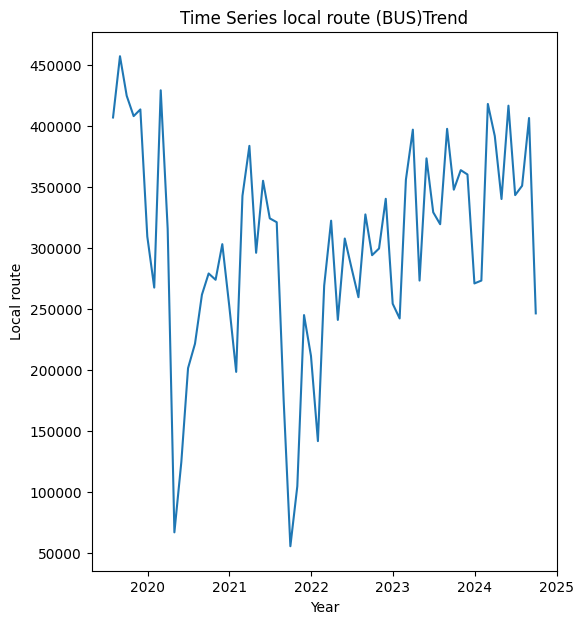

In [339]:
plt.figure(figsize=(6,7))
plt.plot(df['Local Route'])
plt.title("Time Series local route (BUS)Trend")
plt.xlabel("Year")
plt.ylabel("Local route")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


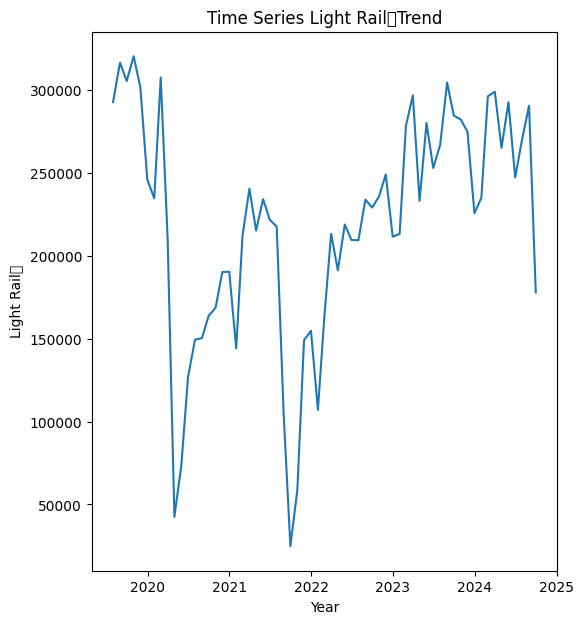

In [340]:
plt.figure(figsize=(6,7))
plt.plot(df['Light Rail'])
plt.title("Time Series Light Rail	Trend")
plt.xlabel("Year")
plt.ylabel("Light Rail	")
plt.show()


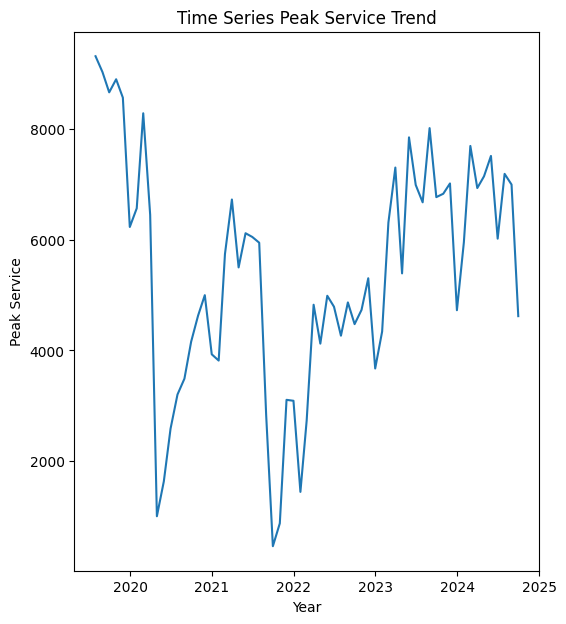

In [341]:
plt.figure(figsize=(6,7))
plt.plot(df['Peak Service'])
plt.title("Time Series Peak Service Trend")
plt.xlabel("Year")
plt.ylabel("Peak Service")
plt.show()


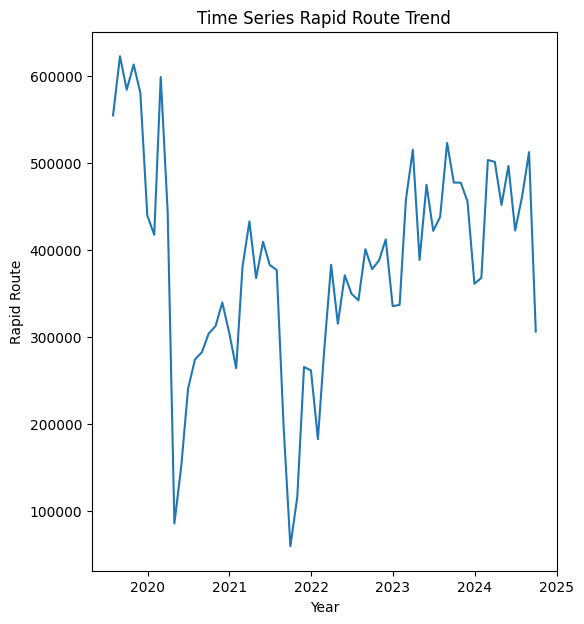

In [342]:
plt.figure(figsize=(6,7))
plt.plot(df['Rapid Route'])
plt.title("Time Series Rapid Route Trend")
plt.xlabel("Year")
plt.ylabel("Rapid Route")
plt.show()


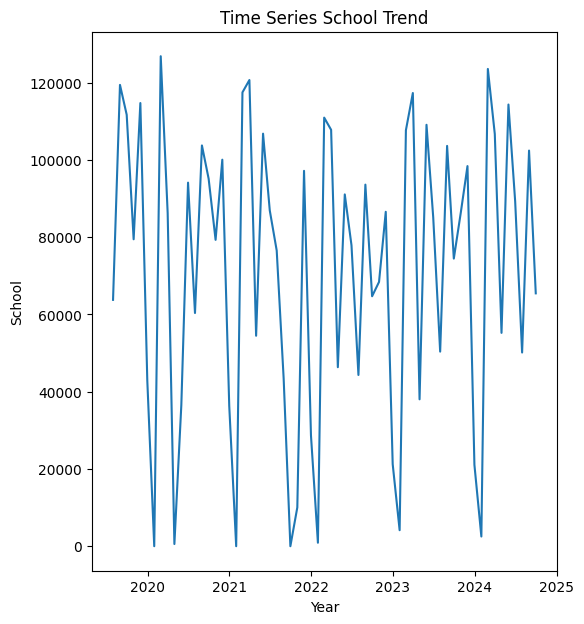

In [343]:
plt.figure(figsize=(6,7))
plt.plot(df['School'])
plt.title("Time Series School Trend")
plt.xlabel("Year")
plt.ylabel("School")
plt.show()


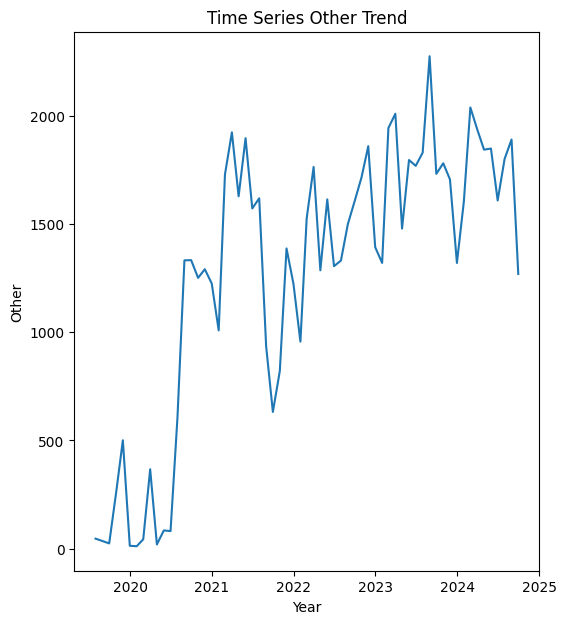

In [344]:
plt.figure(figsize=(6,7))
plt.plot(df['Other'])
plt.title("Time Series Other Trend")
plt.xlabel("Year")
plt.ylabel("Other")
plt.show()


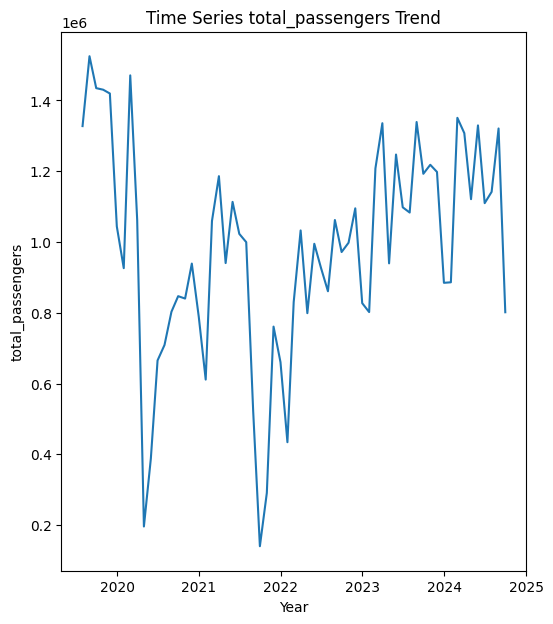

In [345]:
plt.figure(figsize=(6,7))
plt.plot(df['total_passengers'])
plt.title("Time Series total_passengers Trend")
plt.xlabel("Year")
plt.ylabel("total_passengers")
plt.show()


In [346]:
df.head(5)

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,total_passengers
Date,,,,,,,
2019-07-31,406607,292641,9312,555002,63773,46.0,1327381.0
2019-08-31,456797,316416,9026,623134,119419,35.0,1524827.0
2019-09-30,424399,305334,8660,584540,111689,24.0,1434646.0
2019-10-31,407732,320310,8896,613572,79456,259.0,1430225.0
2019-11-30,413213,301518,8564,580930,114722,501.0,1419448.0


#Seasonality

check the repeating patterns is called  seasonality  

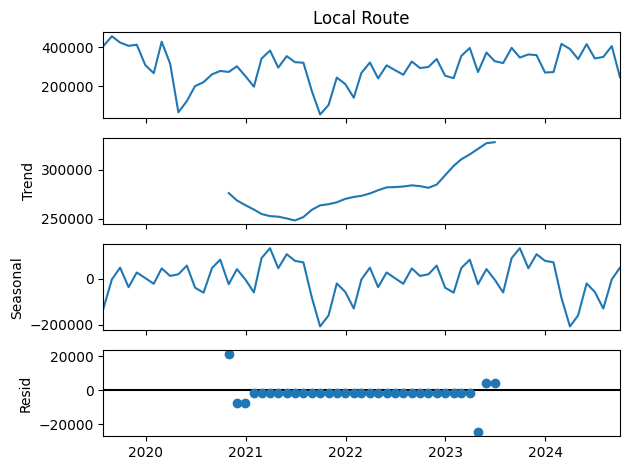

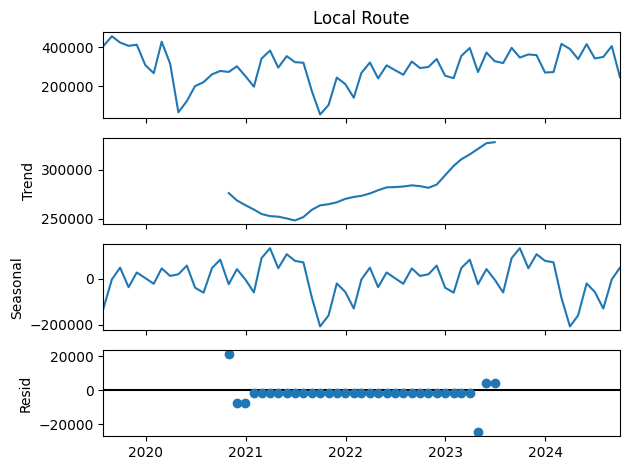

In [347]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(df['Local Route'],model='additive',period=30)
result.plot()

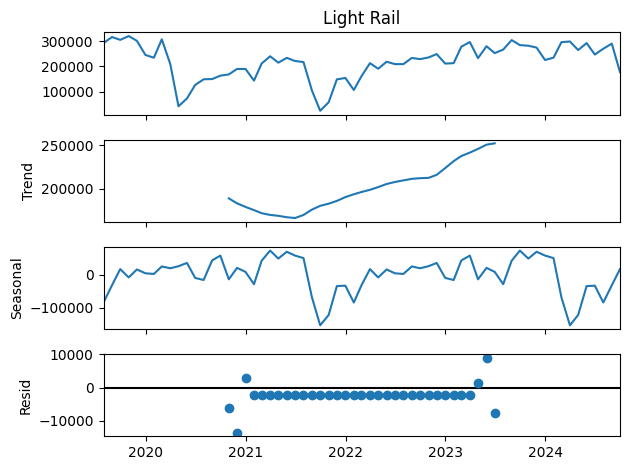

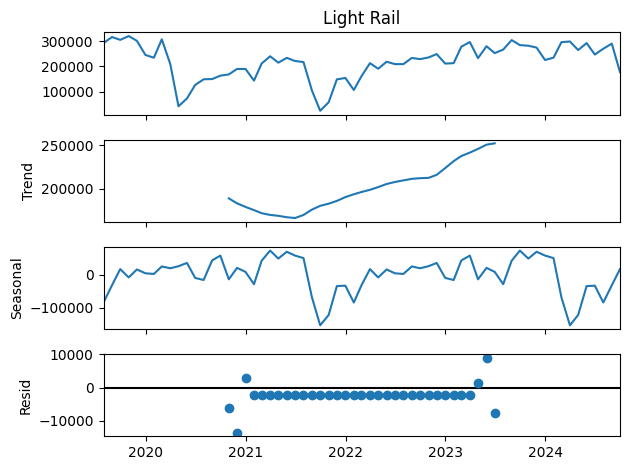

In [348]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(df['Light Rail'],model='additive',period=30)
result.plot()

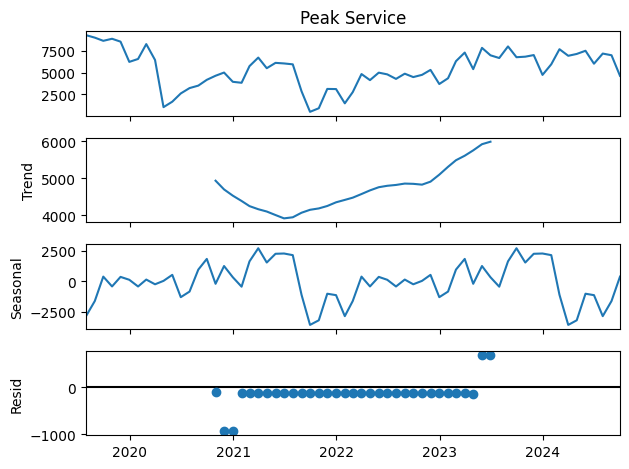

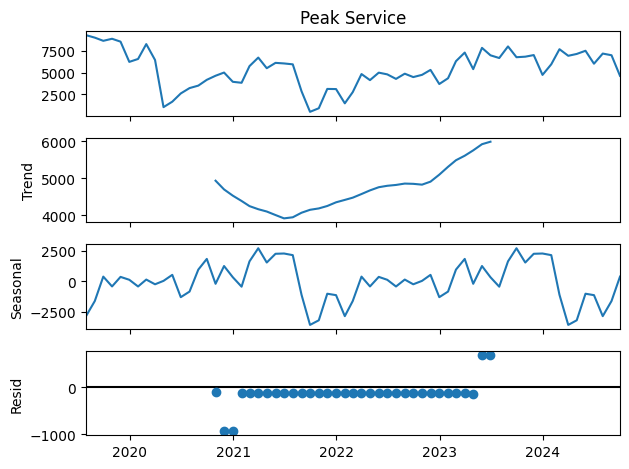

In [349]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(df['Peak Service'],model='additive',period=30)
result.plot()

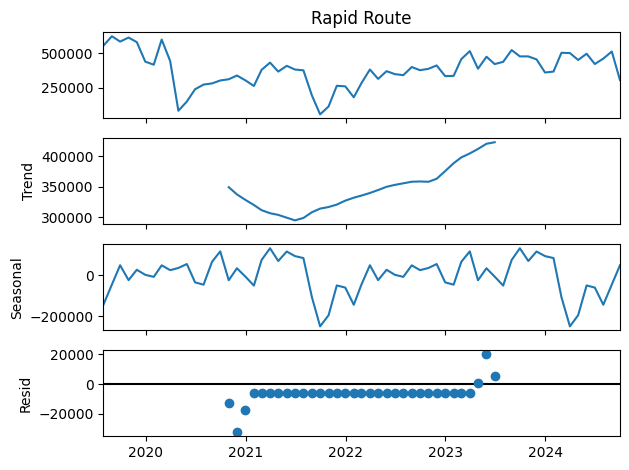

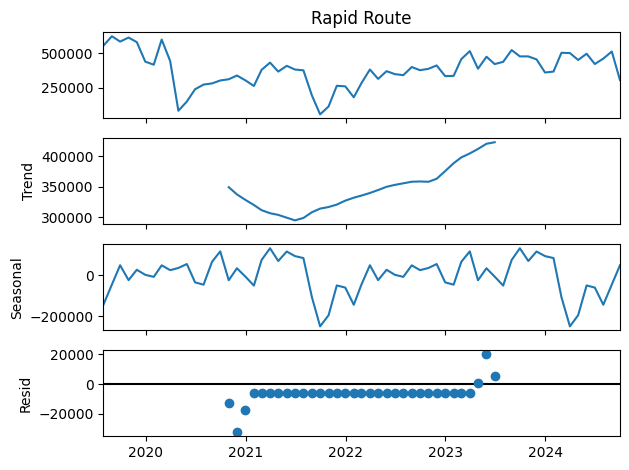

In [350]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(df['Rapid Route'],model='additive',period=30)
result.plot()

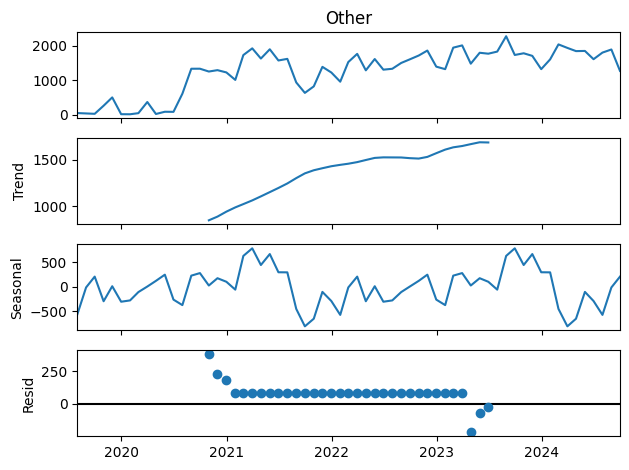

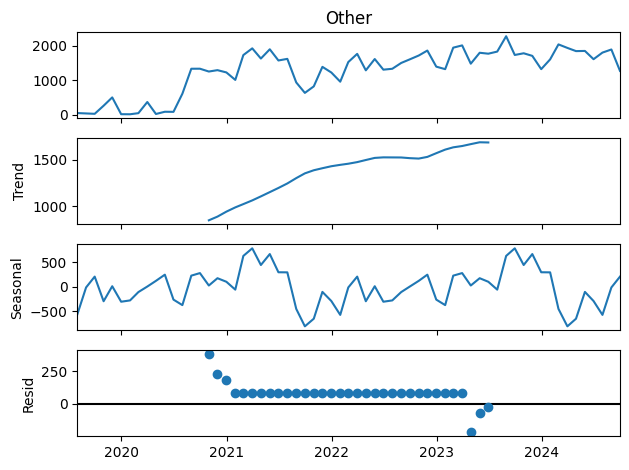

In [351]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(df['Other'],model='additive',period=30)
result.plot()

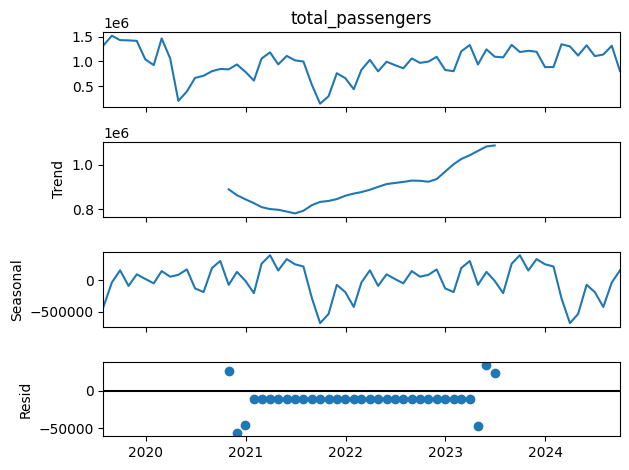

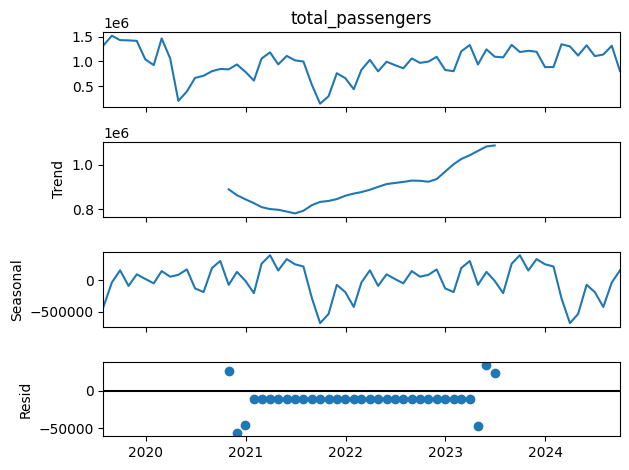

In [352]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(df['total_passengers'],model='additive',period=30)
result.plot()

#Stationarity

Behavior does NOT change over time

##Plot graph
##Rolling

In [353]:
df['rolling_mean1']=df['Local Route'].rolling (12).mean()
df['rolling_std1']=df['Local Route'].rolling (12).std()

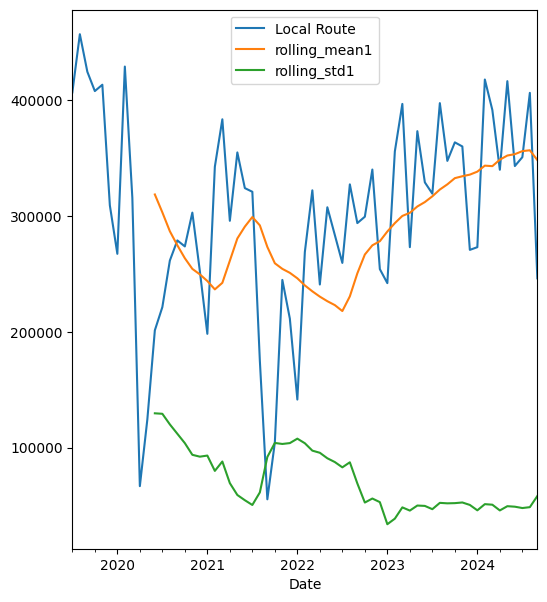

In [354]:
df[['Local Route','rolling_mean1','rolling_std1']].plot(figsize=(6,7))
plt.show()

In [355]:
df['rolling_mean2']=df['Light Rail'].rolling (12).mean()
df['rolling_std2']=df['Light Rail'].rolling (12).std()

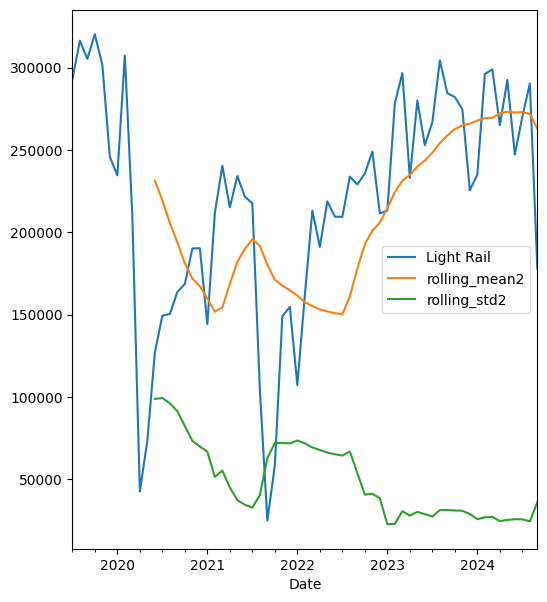

In [356]:
df[['Light Rail','rolling_mean2','rolling_std2']].plot(figsize=(6,7))
plt.show()

In [357]:
df['rolling_mean3']=df['Peak Service'].rolling (12).mean()
df['rolling_std3']=df['Peak Service'].rolling (12).std()

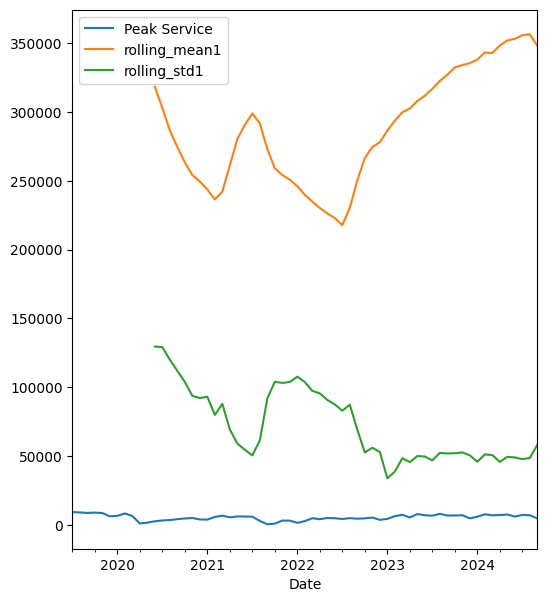

In [358]:
df[['Peak Service','rolling_mean1','rolling_std1']].plot(figsize=(6,7))
plt.show()

In [359]:
df['rolling_mean4']=df['Rapid Route'].rolling (12).mean()
df['rolling_std4']=df['Rapid Route'].rolling (12).std()

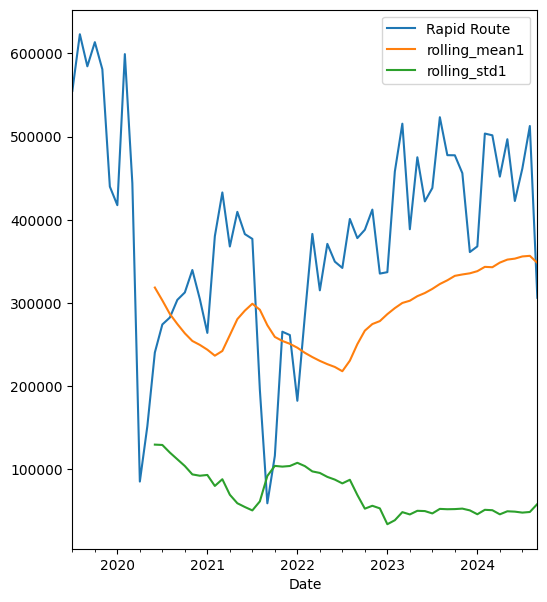

In [360]:
df[['Rapid Route','rolling_mean1','rolling_std1']].plot(figsize=(6,7))
plt.show()

In [361]:
df['rolling_mean5']=df['School'].rolling (12).mean()
df['rolling_std5']=df['School'].rolling (12).std()

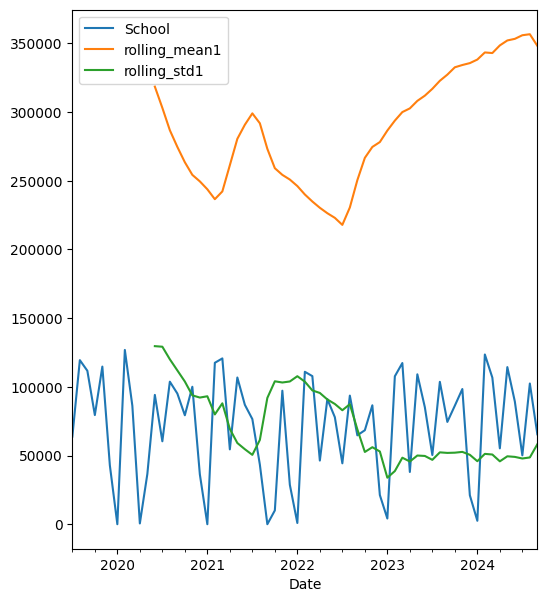

In [362]:
df[['School','rolling_mean1','rolling_std1']].plot(figsize=(6,7))
plt.show()

In [363]:
df['rolling_mean6']=df['Other'].rolling (12).mean()
df['rolling_std6']=df['Other'].rolling (12).std()

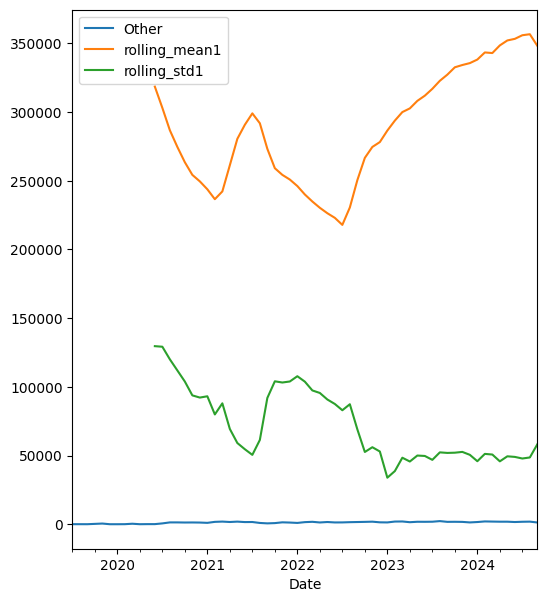

In [364]:
df[['Other','rolling_mean1','rolling_std1']].plot(figsize=(6,7))
plt.show()

In [365]:
df['rolling_mean7']=df['total_passengers'].rolling (12).mean()
df['rolling_std7']=df['total_passengers'].rolling (12).std()

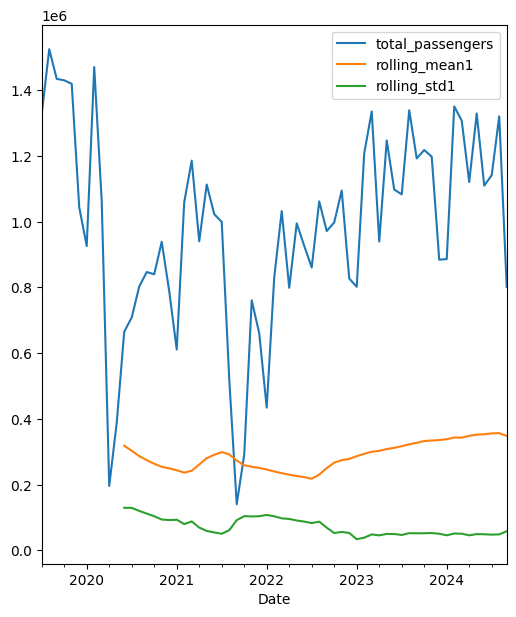

In [366]:
df[['total_passengers','rolling_mean1','rolling_std1']].plot(figsize=(6,7))
plt.show()

In [367]:
df.columns

Index(['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School',
       'Other', 'total_passengers', 'rolling_mean1', 'rolling_std1',
       'rolling_mean2', 'rolling_std2', 'rolling_mean3', 'rolling_std3',
       'rolling_mean4', 'rolling_std4', 'rolling_mean5', 'rolling_std5',
       'rolling_mean6', 'rolling_std6', 'rolling_mean7', 'rolling_std7'],
      dtype='object')

##ADF Test and p value

#H0-->Reject the Null Hypothesis

#H1-->Fail to reject null hypothesis

In [368]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Local Route'])
print("ADF Statistic:",result[0])
print("p->value:",result[1])

if result[1]<=0.05:
  print("This is a Stationary Series")
else:
  print("This is not a Stationary Series")

ADF Statistic: -1.3599463085890944
p->value: 0.601320712746489
This is not a Stationary Series


In [369]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Light Rail'])
print("ADF Statistic:",result[0])
print("p->value:",result[1])

if result[1]<=0.05:
  print("This is a Stationary Series")
else:
  print("This is not a Stationary Series")

ADF Statistic: -2.224030119598973
p->value: 0.1976397847321955
This is not a Stationary Series


In [370]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Peak Service'])
print("ADF Statistic:",result[0])
print("p->value:",result[1])

if result[1]<=0.05:
  print("This is a Stationary Series")
else:
  print("This is not a Stationary Series")

ADF Statistic: -2.4857497334074137
p->value: 0.1189801802105907
This is not a Stationary Series


In [371]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Rapid Route'])
print("ADF Statistic:",result[0])
print("p->value:",result[1])

if result[1]<=0.05:
  print("This is a Stationary Series")
else:
  print("This is not a Stationary Series")

ADF Statistic: -2.4824376988388157
p->value: 0.11980610635528405
This is not a Stationary Series


In [372]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['School'])
print("ADF Statistic:",result[0])
print("p->value:",result[1])

if result[1]<=0.05:
  print("This is a Stationary Series")
else:
  print("This is not a Stationary Series")

ADF Statistic: -1.373169202484958
p->value: 0.5950694245320607
This is not a Stationary Series


In [373]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Other'])
print("ADF Statistic:",result[0])
print("p->value:",result[1])

if result[1]<=0.05:
  print("This is a Stationary Series")
else:
  print("This is not a Stationary Series")

ADF Statistic: -2.511171372498251
p->value: 0.11277981613101645
This is not a Stationary Series


In [374]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['total_passengers'])
print("ADF Statistic:",result[0])
print("p->value:",result[1])

if result[1]<=0.05:
  print("This is a Stationary Series")
else:
  print("This is not a Stationary Series")

ADF Statistic: -1.2052818379403567
p->value: 0.6713194814305452
This is not a Stationary Series


#Fix Non-stationary data

##differencing

In [375]:
df['log_local'] = np.log(df['Local Route'])

df['log_local_route_diff'] = df['log_local'].diff(12)



In [376]:
df['log_local_diff1'] = df['log_local'].diff(1)
df['log_local_diff1_12'] = df['log_local_diff1'].diff(12)


In [377]:
df['log_local1'] = np.log(df['Light Rail'])


df["log_lightrail_diff"] = df["log_local1"].diff(12)


In [378]:
df['log_local2_diff1'] = df['log_local1'].diff(1)
df['log_local2_diff1_12'] = df['log_local2_diff1'].diff(12)

In [379]:
df['log_local2'] = np.log(df['Rapid Route'])
df["log_rapidroute_diff"] = df["log_local2"].diff(12)


In [380]:
df['log_local3_diff1'] = df['log_local2'].diff(1)
df['log_local3_diff1_12'] = df['log_local3_diff1'].diff(12)

In [381]:
df['log_local3'] = np.log(df['School'])
df["school_diff"] = df["log_local3"].diff(12)

df['log_local4_diff1'] = df['log_local3'].diff(1)
df['log_local4_diff1_12'] = df['log_local4_diff1'].diff(12)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [382]:
df['log_local4'] = np.log(df['Other'])
df["log_other_diff"] = df["log_local4"].diff(12)

df['log_local5_diff1'] = df['log_local4'].diff(1)
df['log_local5_diff1_12'] = df['log_local5_diff1'].diff(12)


In [383]:
df['log_local5'] = np.log(df['total_passengers'])
df["log_totalpassenger_diff"] = df["log_local5"].diff(12)

df['log_local6_diff1'] = df['log_local5'].diff(1)
df['log_local6_diff1_12'] = df['log_local6_diff1'].diff(12)

In [384]:
df.head(5)

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,total_passengers,rolling_mean1,rolling_std1,rolling_mean2,...,log_local4_diff1,log_local4_diff1_12,log_local4,log_other_diff,log_local5_diff1,log_local5_diff1_12,log_local5,log_totalpassenger_diff,log_local6_diff1,log_local6_diff1_12
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-31,406607,292641,9312,555002,63773,46.0,1327381.0,NaN,NaN,NaN,...,NaN,NaN,3.828641,NaN,NaN,NaN,14.098718,NaN,NaN,NaN
2019-08-31,456797,316416,9026,623134,119419,35.0,1524827.0,NaN,NaN,NaN,...,0.627308,NaN,3.555348,NaN,-0.273293,NaN,14.237392,NaN,0.138673,NaN
2019-09-30,424399,305334,8660,584540,111689,24.0,1434646.0,NaN,NaN,NaN,...,-0.066920,NaN,3.178054,NaN,-0.377294,NaN,14.176429,NaN,-0.060963,NaN
2019-10-31,407732,320310,8896,613572,79456,259.0,1430225.0,NaN,NaN,NaN,...,-0.340515,NaN,5.556828,NaN,2.378774,NaN,14.173342,NaN,-0.003086,NaN
2019-11-30,413213,301518,8564,580930,114722,501.0,1419448.0,NaN,NaN,NaN,...,0.367308,NaN,6.216606,NaN,0.659778,NaN,14.165779,NaN,-0.007564,NaN


In [385]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['log_local3_diff1_12'].dropna())
print("ADF Statistic:",result[0])#H0-->Reject the Null Hypothesis
print("p->value:",result[1])#H1-->Fail to reject null hypothesis

if result[1]<=0.05:
  print("This is a Stationary Series")
else:
  print("This is not a Stationary Series")

ADF Statistic: -3.349971958980013
p->value: 0.012787240526654744
This is a Stationary Series


In [386]:
from statsmodels.tsa.stattools import adfuller

series_to_test = df['log_local4_diff1_12'].replace([np.inf, -np.inf], np.nan).dropna()
result=adfuller(series_to_test)
print("ADF Statistic:",result[0])#H0-->Reject the Null Hypothesis
print("p->value:",result[1])#H1-->Fail to reject null hypothesis

if result[1]<=0.05:
  print("This is a Stationary Series")
else:
  print("This is not a Stationary Series")

ADF Statistic: -4.252375840308096
p->value: 0.0005365653163848889
This is a Stationary Series


In [387]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['log_local3_diff1_12'].dropna())
print("ADF Statistic:",result[0])#H0-->Reject the Null Hypothesis
print("p->value:",result[1])#H1-->Fail to reject null hypothesis

if result[1]<=0.05:
  print("This is a Stationary Series")
else:
  print("This is not a Stationary Series")

ADF Statistic: -3.349971958980013
p->value: 0.012787240526654744
This is a Stationary Series


In [388]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['log_local5_diff1_12'].dropna())
print("ADF Statistic:",result[0])#H0-->Reject the Null Hypothesis
print("p->value:",result[1])#H1-->Fail to reject null hypothesis

if result[1]<=0.05:
  print("This is a Stationary Series")
else:
  print("This is not a Stationary Series")

ADF Statistic: -7.125689592241948
p->value: 3.6253672220370706e-10
This is a Stationary Series


In [389]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['log_local6_diff1_12'].dropna())
print("ADF Statistic:",result[0])#H0-->Reject the Null Hypothesis
print("p->value:",result[1])#H1-->Fail to reject null hypothesis

if result[1]<=0.05:
  print("This is a Stationary Series")
else:
  print("This is not a Stationary Series")

ADF Statistic: -3.553175684608649
p->value: 0.006721951840189898
This is a Stationary Series


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: xlabel='Date'>

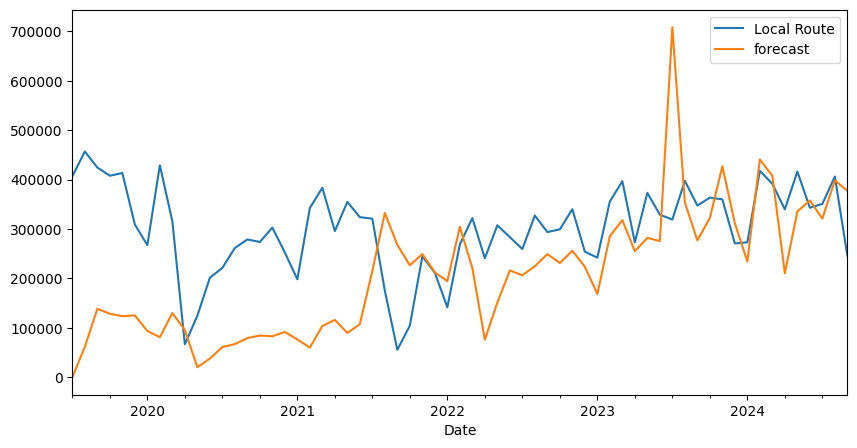

In [390]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Local Route'],order=(1,0,0),seasonal_order=(1,1,1,24),enforce_stationarity=False,
                enforce_invertibility=False)
result=model.fit()
result.summary()
df['forecast'] = result.predict(start=0, end=len(df)-1)
df.head(3)
df[['Local Route','forecast']].plot(figsize=(10,5))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: xlabel='Date'>

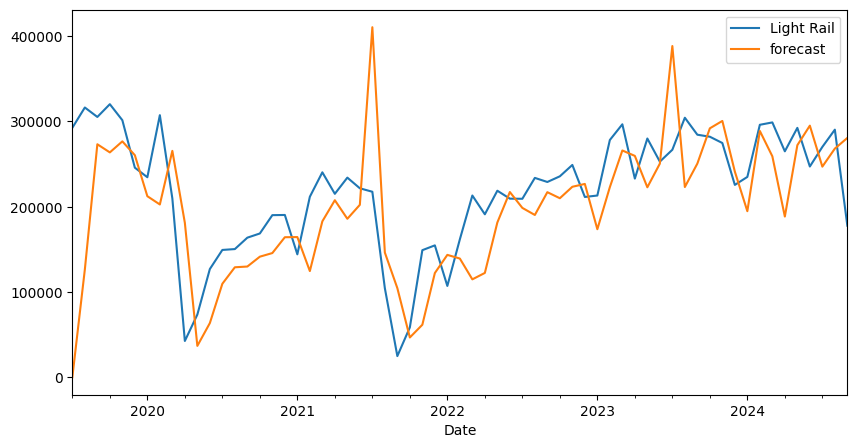

In [391]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Light Rail'],order=(1,0,0),seasonal_order=(1,1,1,24),enforce_stationarity=False,
                enforce_invertibility=False)
result=model.fit()
result.summary()
df['forecast'] = result.predict(start=0, end=len(df)-1)
df.head(3)
df[['Light Rail','forecast']].plot(figsize=(10,5))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: xlabel='Date'>

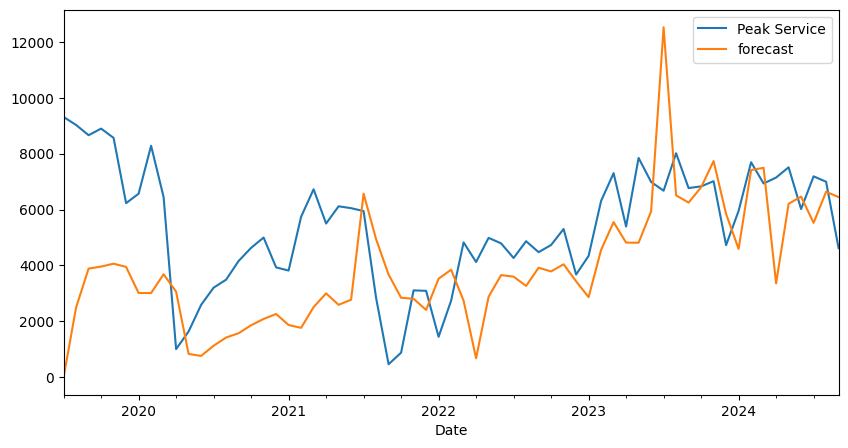

In [392]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Peak Service'],order=(1,0,0),seasonal_order=(1,1,1,24),enforce_stationarity=False,
                enforce_invertibility=False)
result=model.fit()
result.summary()
df['forecast'] = result.predict(start=0, end=len(df)-1)
df.head(3)
df[['Peak Service','forecast']].plot(figsize=(10,5))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: xlabel='Date'>

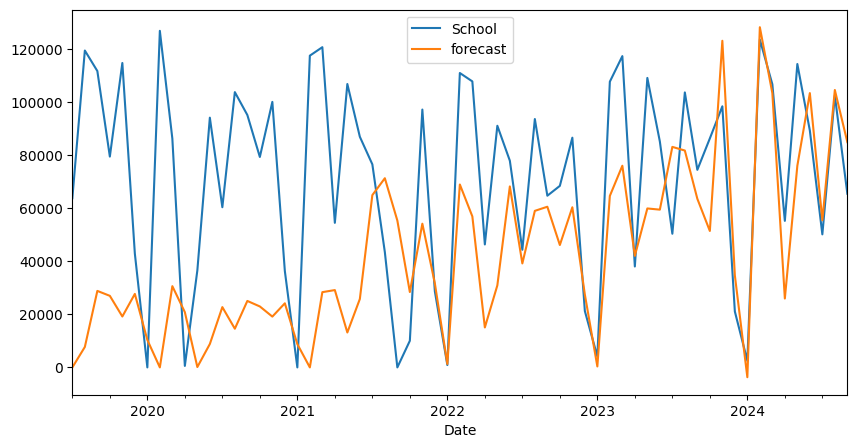

In [393]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['School'],order=(1,0,0),seasonal_order=(1,1,1,24),enforce_stationarity=False,
                enforce_invertibility=False)
result=model.fit()
result.summary()
df['forecast'] = result.predict(start=0, end=len(df)-1)
df.head(3)
df[['School','forecast']].plot(figsize=(10,5))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: xlabel='Date'>

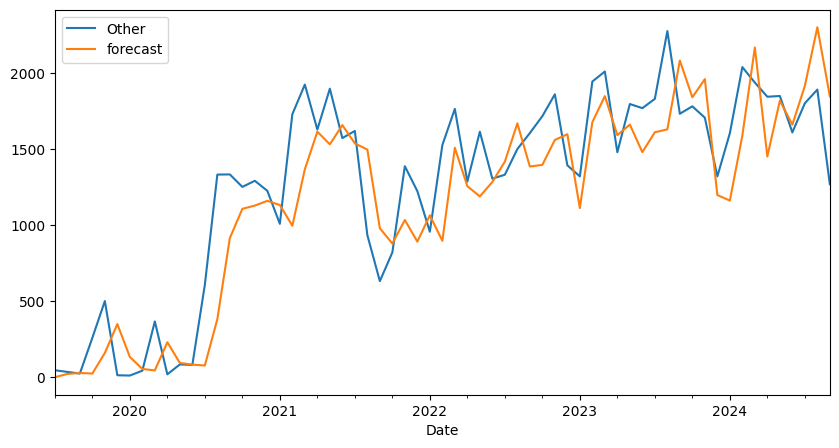

In [394]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Other'],order=(1,0,0),seasonal_order=(1,1,1,24),enforce_stationarity=False,
                enforce_invertibility=False)
result=model.fit()
result.summary()
df['forecast'] = result.predict(start=0, end=len(df)-1)
df.head(3)
df[['Other','forecast']].plot(figsize=(10,5))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: xlabel='Date'>

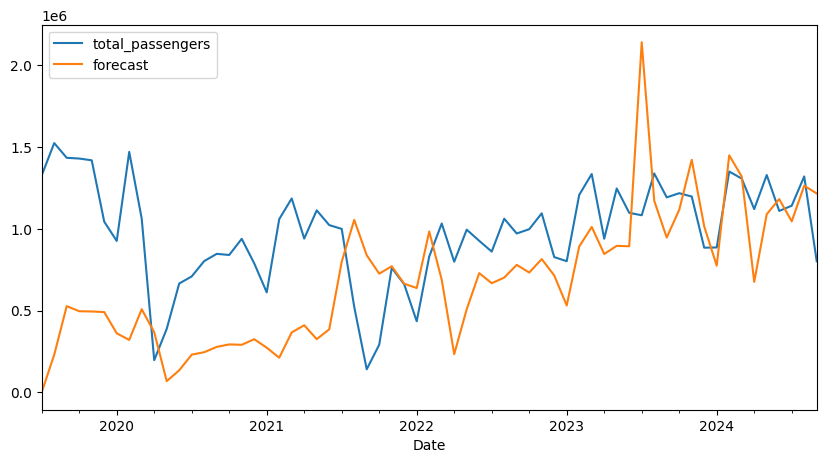

In [395]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['total_passengers'],order=(1,0,0),seasonal_order=(1,1,1,24),enforce_stationarity=False,
                enforce_invertibility=False)
result=model.fit()
result.summary()
df['forecast'] = result.predict(start=0, end=len(df)-1)
df.head(3)
df[['total_passengers','forecast']].plot(figsize=(10,5))

In [396]:
from pandas.tseries.offsets import DateOffset
future_dataset=[df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [397]:
future_dataset_df=pd.DataFrame(index=future_dataset[1:],columns=df.columns)

In [398]:
print(future_dataset_df)

           Local Route Light Rail Peak Service Rapid Route School Other  \
2024-10-30         NaN        NaN          NaN         NaN    NaN   NaN   
2024-11-30         NaN        NaN          NaN         NaN    NaN   NaN   
2024-12-30         NaN        NaN          NaN         NaN    NaN   NaN   
2025-01-30         NaN        NaN          NaN         NaN    NaN   NaN   
2025-02-28         NaN        NaN          NaN         NaN    NaN   NaN   
2025-03-30         NaN        NaN          NaN         NaN    NaN   NaN   
2025-04-30         NaN        NaN          NaN         NaN    NaN   NaN   
2025-05-30         NaN        NaN          NaN         NaN    NaN   NaN   
2025-06-30         NaN        NaN          NaN         NaN    NaN   NaN   
2025-07-30         NaN        NaN          NaN         NaN    NaN   NaN   
2025-08-30         NaN        NaN          NaN         NaN    NaN   NaN   
2025-09-30         NaN        NaN          NaN         NaN    NaN   NaN   
2025-10-30         NaN   

In [399]:
future_dataset_df.tail()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,total_passengers,rolling_mean1,rolling_std1,rolling_mean2,...,log_local4_diff1_12,log_local4,log_other_diff,log_local5_diff1,log_local5_diff1_12,log_local5,log_totalpassenger_diff,log_local6_diff1,log_local6_diff1_12,forecast
2026-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [400]:
future_df=pd.concat([df,future_dataset_df])


/tmp/ipython-input-570077628.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_dataset_df])


In [401]:
future_df.shape

(86, 46)

<Axes: >

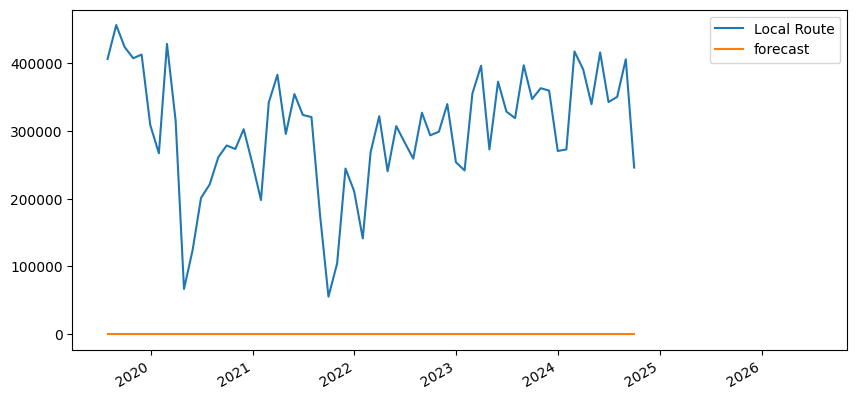

In [402]:
future_df['forecast'] = result.predict(start=0, end=len(future_df)-1, dynamic=True)
future_df[['Local Route','forecast']].plot(figsize=(10,5))

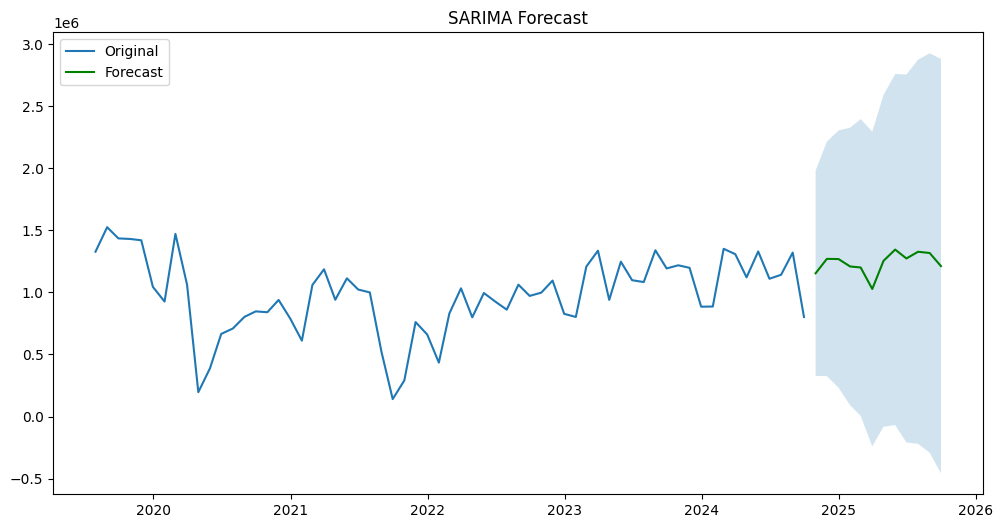

In [403]:
n_steps = 12   # forecast 1 year

forecast = sarima_model.get_forecast(steps=n_steps)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(12,6))
plt.plot(df["total_passengers"], label="Original")
plt.plot(predicted_mean, label="Forecast", color='green')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 alpha=0.2)
plt.title("SARIMA Forecast")
plt.legend()
plt.show()


In [404]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Local Route'],order=(1,0,0),seasonal_order=(1,1,1,24),enforce_stationarity=False,
                enforce_invertibility=False)
result=model.fit()
result.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          Local Route   No. Observations:                   63
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 24)   Log Likelihood                -175.503
Date:                              Wed, 03 Dec 2025   AIC                            359.007
Time:                                      07:32:06   BIC                            361.563
Sample:                                  07-31-2019   HQIC                           358.770
                                       - 09-30-2024                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3029      0.557      0.544      0.586      -0.788       1.394
ar.S.L24      -1.4240      1.376     -1.035      0.301      -4.121       1.273
ma.S.L24       1.1753      1.579      0.744      0.457      -1.920       4.271
sigma2      6.392e+09   1.47e-10   4.35e+19      0.000    6.39e+09    6.39e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.60   Prob(JB):                         0.88
Heteroskedasticity (H):               1.69   Skew:                            -0.33
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.7e+36. Standard errors may be unstable.
"""

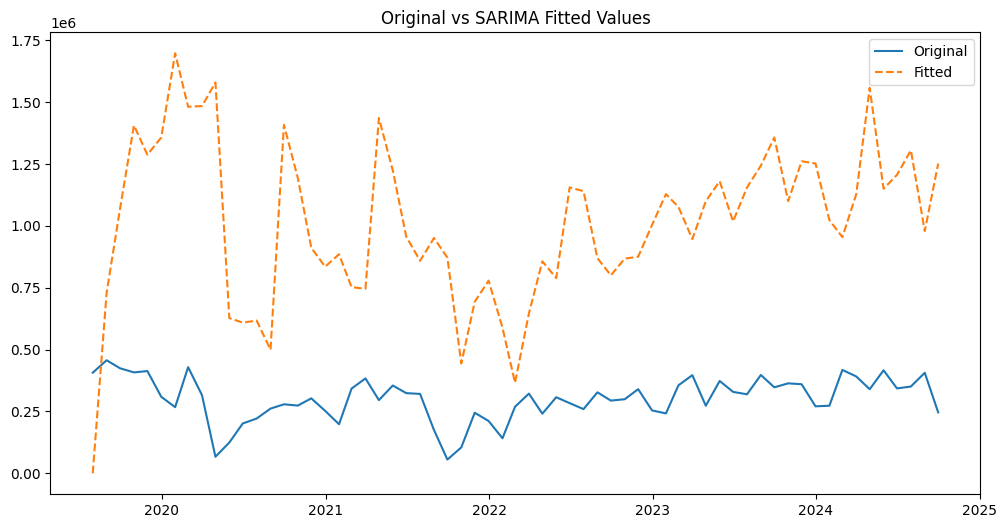

In [405]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df["Local Route"], label="Original")
plt.plot(sarima_model.fittedvalues, label="Fitted", linestyle="--")
plt.title("Original vs SARIMA Fitted Values")
plt.legend()
plt.show()


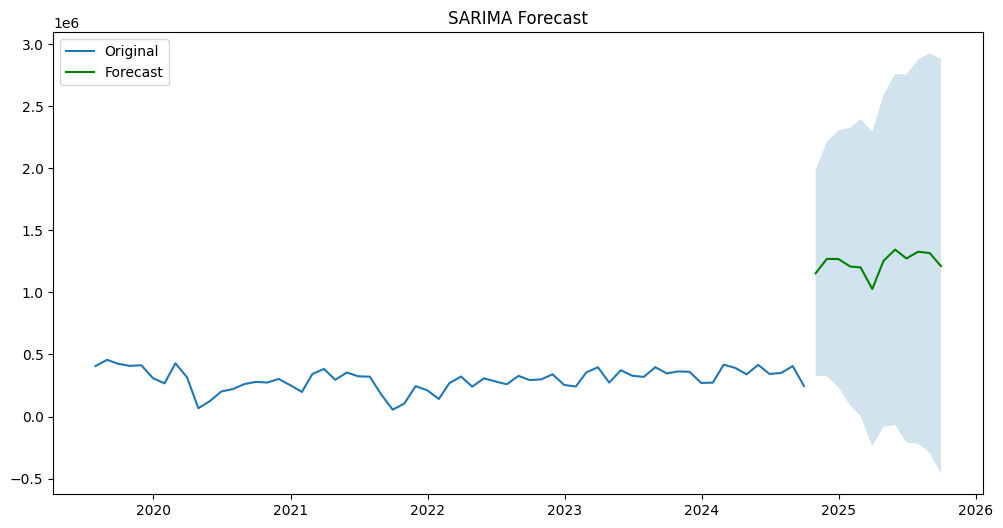

In [406]:
plt.figure(figsize=(12,6))
plt.plot(df["Local Route"], label="Original")
plt.plot(predicted_mean, label="Forecast", color='green')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 alpha=0.2)
plt.title("SARIMA Forecast")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


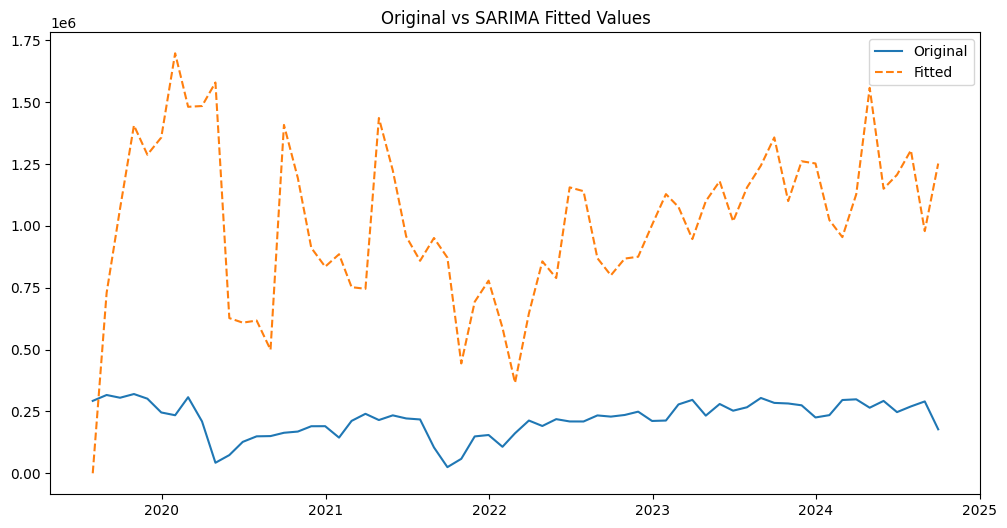

In [407]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Light Rail'],order=(1,0,0),seasonal_order=(1,1,1,24),enforce_stationarity=False,
                enforce_invertibility=False)
result=model.fit()
result.summary()
plt.figure(figsize=(12,6))
plt.plot(df["Light Rail"], label="Original")
plt.plot(sarima_model.fittedvalues, label="Fitted", linestyle="--")
plt.title("Original vs SARIMA Fitted Values")
plt.legend()
plt.show()

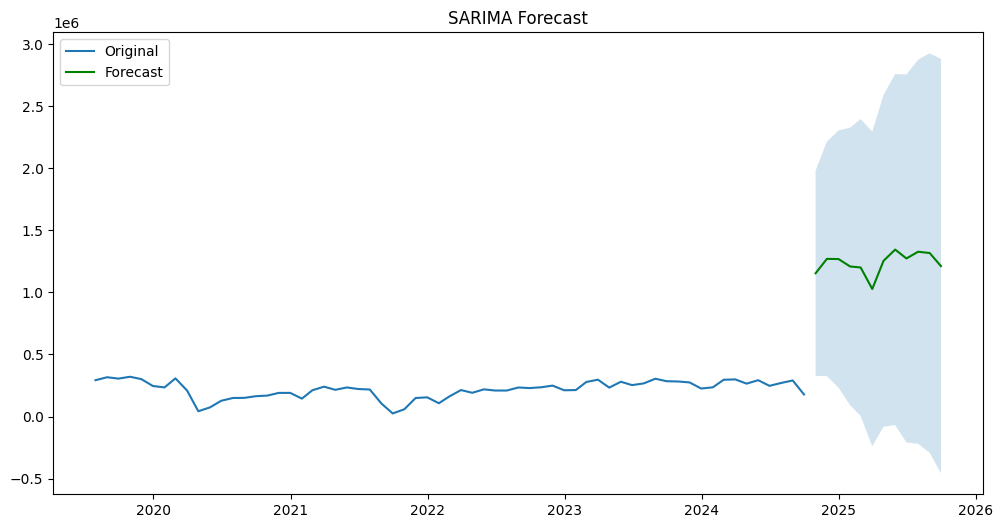

In [408]:
plt.figure(figsize=(12,6))
plt.plot(df["Light Rail"], label="Original")
plt.plot(predicted_mean, label="Forecast", color='green')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 alpha=0.2)
plt.title("SARIMA Forecast")
plt.legend()
plt.show()

#PROPHET

Daily transport data

Trend + weekly pattern

Missing values

No manual tuning

In [409]:
prophet_df = df.reset_index()[["Date", "total_passengers"]]
prophet_df = prophet_df.rename(columns={"Date": "ds", "total_passengers": "y"})

In [410]:
from prophet import Prophet

model = Prophet()
model.fit(prophet_df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [411]:
prophet_df.head(5)

,ds,y
0,2019-07-31,1327381.0
1,2019-08-31,1524827.0
2,2019-09-30,1434646.0
3,2019-10-31,1430225.0
4,2019-11-30,1419448.0


In [412]:
future = model.make_future_dataframe(periods=30)


In [413]:
forecast = model.predict(future)


In [414]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()


,ds,yhat,yhat_lower,yhat_upper
88,2024-10-26,1.271578e+06,945477.495695,1.614988e+06
89,2024-10-27,1.254029e+06,936288.276011,1.604595e+06
90,2024-10-28,1.218582e+06,883400.796750,1.535242e+06
91,2024-10-29,1.166204e+06,837139.849853,1.518392e+06
92,2024-10-30,1.098341e+06,743804.795140,1.444711e+06


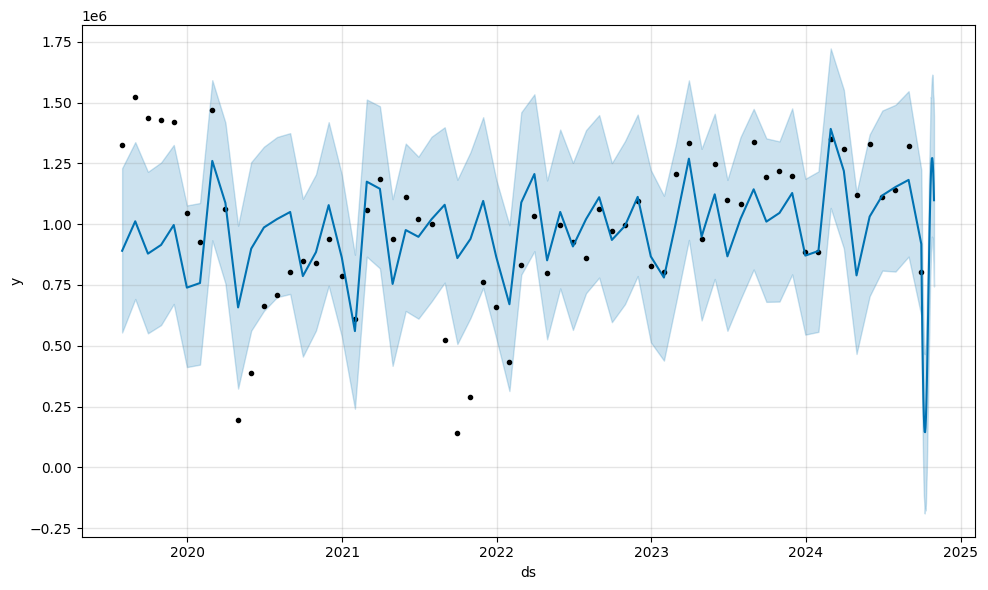

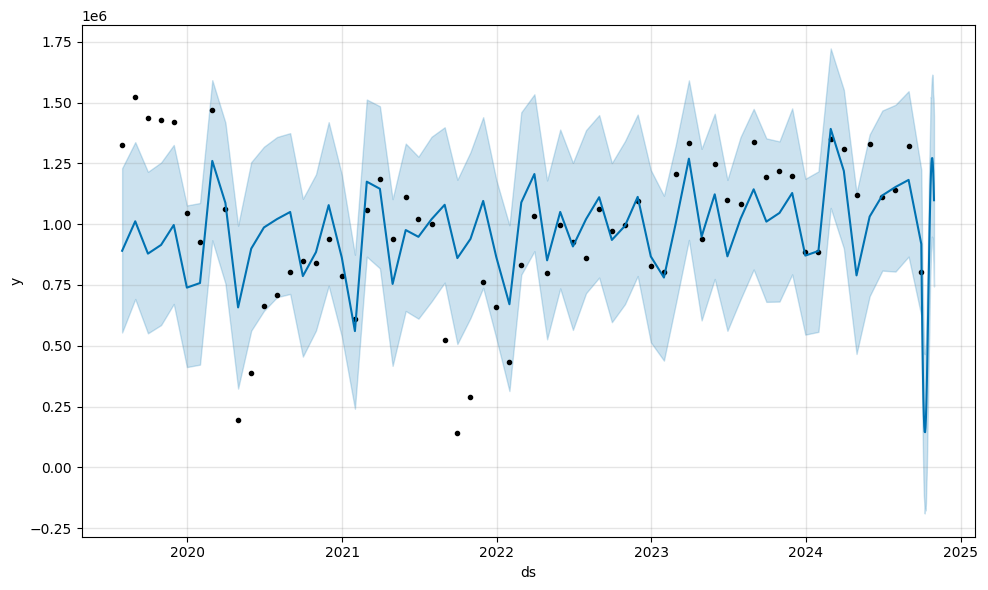

In [415]:
model.plot(forecast)


Insights:

1. The dataset shows a strong upward trend over time in Local Route

2.   Clear seasonality patterns exist (weekly/monthly cycles) in light Rail

3.  Outliers detected in this columns (festival days,special events)

4.  Weak seasonality, dominated by random events


5. Strong weekly cycle: highest on Fridays



In [415]:
I